In [98]:
# step-1
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pandas

In [99]:
df1=pd.read_csv("pilani_dataset.csv", header=25)
df1

,YEAR,MO,DY,HR,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SRF_ALB,SZA,ALLSKY_SFC_PAR_TOT,...,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,T2M,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WS50M
0,2017,1,1,0,0.0,0.0,-999.0,-999.0,90.0,0.0,...,0.0,0.0,0.0,12.05,4.82,54.31,0.0,98.34,2.89,5.63
1,2017,1,1,1,0.0,0.0,-999.0,-999.0,90.0,0.0,...,0.0,0.0,0.0,11.58,4.88,56.19,0.0,98.31,2.65,5.07
2,2017,1,1,2,0.0,0.0,-999.0,-999.0,90.0,0.0,...,0.0,0.0,0.0,11.21,4.88,57.69,0.0,98.30,2.34,4.28
3,2017,1,1,3,0.0,0.0,-999.0,-999.0,90.0,0.0,...,0.0,0.0,0.0,10.82,4.88,59.12,0.0,98.31,2.00,3.48
4,2017,1,1,4,0.0,0.0,-999.0,-999.0,90.0,0.0,...,0.0,0.0,0.0,10.41,4.88,60.62,0.0,98.32,1.73,2.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35083,2021,1,1,19,0.0,0.0,-999.0,-999.0,90.0,0.0,...,0.0,0.0,0.0,12.31,3.36,37.38,0.0,98.50,2.89,4.95
35084,2021,1,1,20,0.0,0.0,-999.0,-999.0,90.0,0.0,...,0.0,0.0,0.0,11.62,3.36,39.12,0.0,98.51,3.05,5.42
35085,2021,1,1,21,0.0,0.0,-999.0,-999.0,90.0,0.0,...,0.0,0.0,0.0,11.08,3.42,40.56,0.0,98.51,3.21,5.94
35086,2021,1,1,22,0.0,0.0,-999.0,-999.0,90.0,0.0,...,0.0,0.0,0.0,10.68,3.36,41.50,0.0,98.49,3.29,6.32


In [100]:
df1= df1.drop(columns=['CLRSKY_SFC_SW_DWN','CLRSKY_SFC_PAR_TOT', 'ALLSKY_KT',	'ALLSKY_SRF_ALB',	'SZA', 'ALLSKY_SFC_PAR_TOT', 'ALLSKY_SFC_UVA',	'ALLSKY_SFC_UVB',	'ALLSKY_SFC_UV_INDEX' ,'RH2M', 'WS10M'])

In [101]:
#renaming columns
columns= ['Year', 'Month', 'Day', 'Hour', 'Radiation', 'Temperature', 'Precipitation', 'Humidity', 'Pressure', 'Windspeed']
df1.columns= columns

In [102]:
#step 3
print(df1.describe())

               Year         Month           Day          Hour     Radiation  \
count  35088.000000  35088.000000  35088.000000  35088.000000  35088.000000   
mean    2018.502736      6.519152     15.719562     11.500000    216.551719   
std        1.119880      3.450595      8.805632      6.922285    291.011280   
min     2017.000000      1.000000      1.000000      0.000000      0.000000   
25%     2018.000000      4.000000      8.000000      5.750000      0.000000   
50%     2019.000000      7.000000     16.000000     11.500000     11.975000   
75%     2020.000000     10.000000     23.000000     17.250000    432.927500   
max     2021.000000     12.000000     31.000000     23.000000   1027.510000   

        Temperature  Precipitation      Humidity      Pressure     Windspeed  
count  35088.000000   35088.000000  35088.000000  35088.000000  35088.000000  
mean      25.945676       9.043818      0.056517     97.776416      4.047901  
std        9.210205       5.662848      0.293343   

# 1.Pre-process

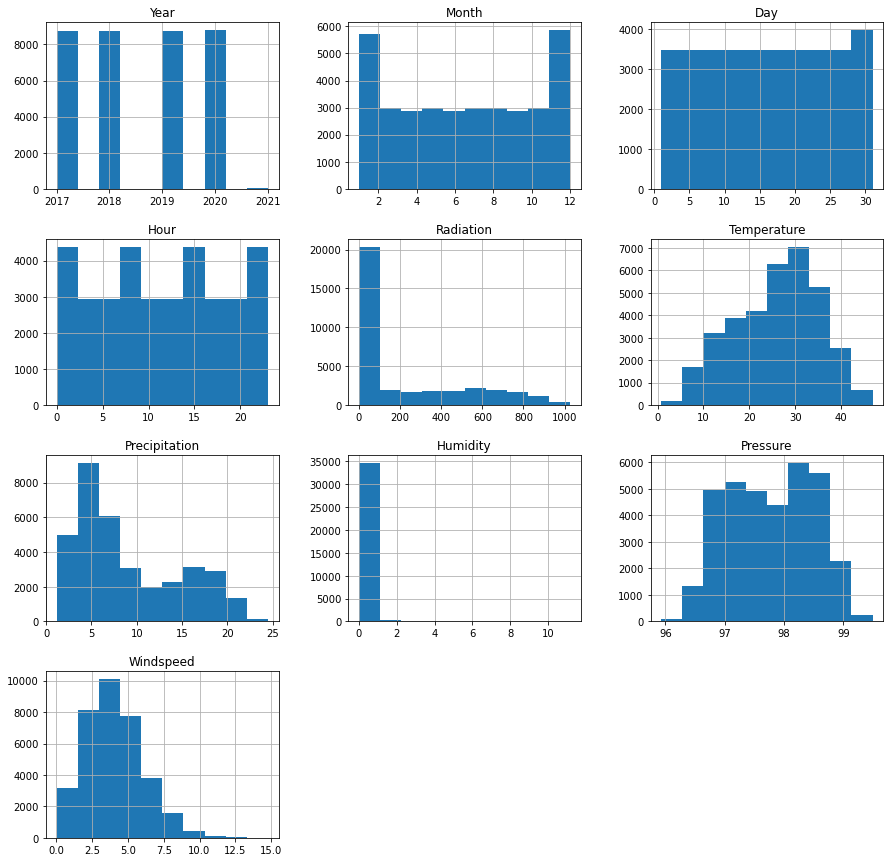

In [103]:
df1.hist(figsize=(15,15))
plt.show()

In [104]:
# scatter plot matrix
# from pandas.plotting import scatter_matrix
# scatter_matrix(df1)
# plt.show()

In [105]:
#step 6
c=df1.corr(method='pearson')
print("The correlation matrix: ",c)

The correlation matrix:                         Year         Month           Day          Hour  \
Year           1.000000e+00 -3.642278e-03 -1.170739e-03 -4.313036e-15   
Month         -3.642278e-03  1.000000e+00  1.233315e-02 -1.315129e-16   
Day           -1.170739e-03  1.233315e-02  1.000000e+00 -3.901665e-17   
Hour          -4.313036e-15 -1.315129e-16 -3.901665e-17  1.000000e+00   
Radiation     -5.500946e-03 -4.891133e-02 -2.285347e-03 -3.979422e-03   
Temperature   -4.403026e-02  7.321372e-02 -5.037638e-03  1.978081e-01   
Precipitation  9.446983e-02  2.050796e-01  1.554026e-02 -2.805859e-02   
Humidity       2.259025e-02  1.331792e-02  2.554228e-02 -4.299442e-02   
Pressure       2.941847e-02 -5.236586e-02  1.224063e-02 -3.470320e-02   
Windspeed     -5.360716e-02 -8.846961e-02  3.111774e-02  5.539046e-02   

               Radiation  Temperature  Precipitation  Humidity  Pressure  \
Year           -0.005501    -0.044030       0.094470  0.022590  0.029418   
Month          -0.0

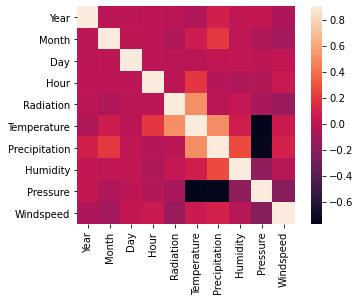

In [106]:
#step -7

#Correlation map to see how features are correlated with radiation
corrmat = df1.corr()
plt.subplots()
#figsize=(12,9)
sns.heatmap(corrmat, vmax=0.9, square=True)
plt.show()

In [107]:

# The time variable is converted into seconds.
#the time at which data was collected
time=df1[['Hour']].values
#print(time[0][0][0:2]) #hour
#print(time[0][0][3:5]) #min
#print(time[0][0][6:8]) #second

i=0
TimeX=[]
for i in range(len(time)):
    temp=(int(time[i])*3600)
    TimeX.append(temp)

TimeX
df1['time_in_sec']=TimeX
print(df1)

       Year  Month  Day  Hour  Radiation  Temperature  Precipitation  \
0      2017      1    1     0        0.0        12.05           4.82   
1      2017      1    1     1        0.0        11.58           4.88   
2      2017      1    1     2        0.0        11.21           4.88   
3      2017      1    1     3        0.0        10.82           4.88   
4      2017      1    1     4        0.0        10.41           4.88   
...     ...    ...  ...   ...        ...          ...            ...   
35083  2021      1    1    19        0.0        12.31           3.36   
35084  2021      1    1    20        0.0        11.62           3.36   
35085  2021      1    1    21        0.0        11.08           3.42   
35086  2021      1    1    22        0.0        10.68           3.36   
35087  2021      1    1    23        0.0        10.34           3.36   

       Humidity  Pressure  Windspeed  time_in_sec  
0           0.0     98.34       5.63            0  
1           0.0     98.31      

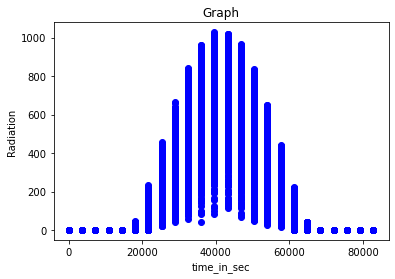

In [108]:

# graph is plotted between time and radiation
# it comes out as perfectly skewed

plt.scatter(df1.time_in_sec,df1.Radiation,color='blue')
plt.xlabel("time_in_sec")
plt.ylabel("Radiation")
plt.title("Graph")
plt.show()

The p-value for both are 0. 
We try to play around, and muliply the two values of these two dataframes, and again find least square fits.

In [109]:
# step-12

model=smf.ols('Radiation ~ Temperature+ Humidity +Humidity*Temperature', df1) 
Fitting_results=model.fit() 
print(Fitting_results.summary().tables[1])

                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -198.3096      4.018    -49.361      0.000    -206.184    -190.435
Temperature             15.9979      0.147    109.067      0.000      15.710      16.285
Humidity              -272.3897     25.949    -10.497      0.000    -323.250    -221.529
Humidity:Temperature     8.9470      0.860     10.401      0.000       7.261      10.633


The p-values are again 0 , the standard error for Humidity*Temperature is 0.007 . This column appears to be very important.

In [110]:

# therefore we make it a new data frame
Temp_multiply_humid=df1.Humidity *df1.Temperature
df1['Temp_multiply_humid']=Temp_multiply_humid
print(df1)

       Year  Month  Day  Hour  Radiation  Temperature  Precipitation  \
0      2017      1    1     0        0.0        12.05           4.82   
1      2017      1    1     1        0.0        11.58           4.88   
2      2017      1    1     2        0.0        11.21           4.88   
3      2017      1    1     3        0.0        10.82           4.88   
4      2017      1    1     4        0.0        10.41           4.88   
...     ...    ...  ...   ...        ...          ...            ...   
35083  2021      1    1    19        0.0        12.31           3.36   
35084  2021      1    1    20        0.0        11.62           3.36   
35085  2021      1    1    21        0.0        11.08           3.42   
35086  2021      1    1    22        0.0        10.68           3.36   
35087  2021      1    1    23        0.0        10.34           3.36   

       Humidity  Pressure  Windspeed  time_in_sec  Temp_multiply_humid  
0           0.0     98.34       5.63            0             

Only month and day of month look important, so we create 2 new dataframes named Month and Day_of_Month.

In [111]:
#step 14
# df1['Month']=[d.split('/')[0] for d in df1.Data]
# df1['Day_of_month']=[d.split('/')[1] for d in df1.Data]
# print(df1)

the name WindDirection(Degrees) cannot be used because of parenthesis. We can not rename a data frame.
So we save its values into a new dataframe.

In [112]:
#step 15
# df1['wind_dir'] = df1['WindDirection(Degrees)']
# print(df1)

In [113]:
#step 16
#We drop the following columns
# df1 = df1.drop(['UNIXTime','Data','TimeSunRise','TimeSunSet','WindDirection(Degrees)'], axis=1)
# print(df1)

In [114]:
#Transform the time_in_sec and month columns to integer labels

le = preprocessing.LabelEncoder()
df1.time_in_sec = le.fit_transform(df1.time_in_sec)
print(df1.Month.unique())
df1.Month = le.fit_transform(df1.Month)
df1.Day=le.fit_transform(df1.Day)
print(df1)
print(df1.Month.unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12]
       Year  Month  Day  Hour  Radiation  Temperature  Precipitation  \
0      2017      0    0     0        0.0        12.05           4.82   
1      2017      0    0     1        0.0        11.58           4.88   
2      2017      0    0     2        0.0        11.21           4.88   
3      2017      0    0     3        0.0        10.82           4.88   
4      2017      0    0     4        0.0        10.41           4.88   
...     ...    ...  ...   ...        ...          ...            ...   
35083  2021      0    0    19        0.0        12.31           3.36   
35084  2021      0    0    20        0.0        11.62           3.36   
35085  2021      0    0    21        0.0        11.08           3.42   
35086  2021      0    0    22        0.0        10.68           3.36   
35087  2021      0    0    23        0.0        10.34           3.36   

       Humidity  Pressure  Windspeed  time_in_sec  Temp_multiply_humid  
0           0.0     98.3

In [115]:

#We now check the data-set
print(df1.columns)

Index(['Year', 'Month', 'Day', 'Hour', 'Radiation', 'Temperature',
       'Precipitation', 'Humidity', 'Pressure', 'Windspeed', 'time_in_sec',
       'Temp_multiply_humid'],
      dtype='object')


In [116]:
#step 19
c=df1.corr(method='pearson')
print("The correlation matrix: ",c)

The correlation matrix:                               Year         Month           Day          Hour  \
Year                 1.000000e+00 -3.642278e-03 -1.170739e-03 -4.313036e-15   
Month               -3.642278e-03  1.000000e+00  1.233315e-02 -1.334798e-16   
Day                 -1.170739e-03  1.233315e-02  1.000000e+00 -3.869771e-17   
Hour                -4.313036e-15 -1.334798e-16 -3.869771e-17  1.000000e+00   
Radiation           -5.500946e-03 -4.891133e-02 -2.285347e-03 -3.979422e-03   
Temperature         -4.403026e-02  7.321372e-02 -5.037638e-03  1.978081e-01   
Precipitation        9.446983e-02  2.050796e-01  1.554026e-02 -2.805859e-02   
Humidity             2.259025e-02  1.331792e-02  2.554228e-02 -4.299442e-02   
Pressure             2.941847e-02 -5.236586e-02  1.224063e-02 -3.470320e-02   
Windspeed           -5.360716e-02 -8.846961e-02  3.111774e-02  5.539046e-02   
time_in_sec         -4.313036e-15 -1.334798e-16 -3.869771e-17  1.000000e+00   
Temp_multiply_humid  2.4594

In [117]:
c=df1['Pressure'].corr(df1['Windspeed'])
print("The correlation matrix: ",c)

The correlation matrix:  -0.20546747866380474


In [118]:
Presssure_multiply_speed=df1.Pressure *df1.Windspeed
df1['Presssure_multiply_speed']=Presssure_multiply_speed

In [119]:
c=df1['Month'].corr(df1['Humidity'])
print("The correlation matrix: ",c)

The correlation matrix:  0.013317919269740677


In [120]:
Month_multiply_Temperature=df1.Temperature *df1.Month
df1['Month_multiply_Temperature']=Month_multiply_Temperature

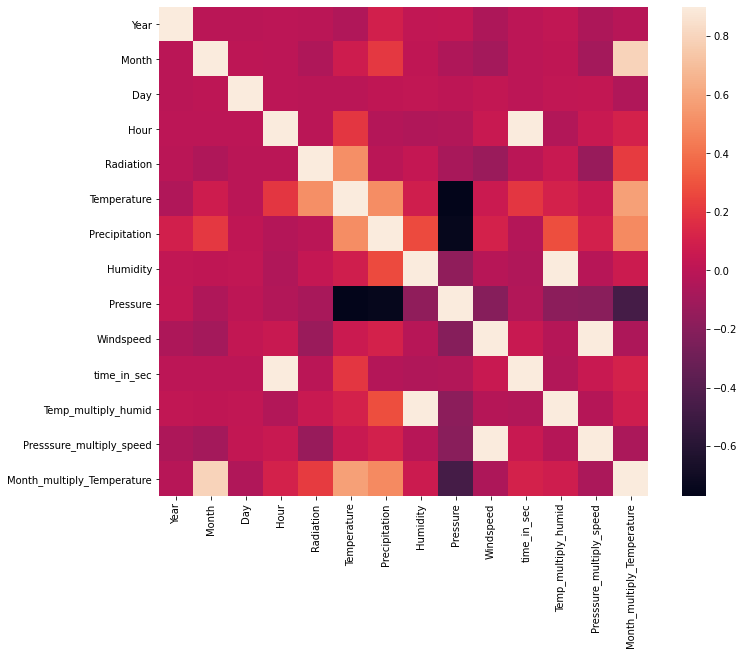

In [121]:

#Correlation map to see how features are correlated with Radiation
corrmat = df1.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)
plt.show()

In [122]:
pclass_group=df1.groupby(['Month']).mean()
print(pclass_group)

              Year        Day  Hour   Radiation  Temperature  Precipitation  \
Month                                                                         
0      2018.520000  14.880000  11.5  146.712893    13.603843       3.956503   
1      2018.513274  13.628319  11.5  194.018352    17.542611       4.222518   
2      2018.500000  15.000000  11.5  239.420941    22.834466       5.387856   
3      2018.500000  14.500000  11.5  281.745104    30.316250       6.627708   
4      2018.500000  15.000000  11.5  290.699321    34.142964       8.066764   
5      2018.500000  14.500000  11.5  267.846892    35.638080      13.031267   
6      2018.500000  15.000000  11.5  228.982944    33.002712      17.750208   
7      2018.500000  15.000000  11.5  221.271290    31.333296      18.138632   
8      2018.500000  14.500000  11.5  224.683993    30.336142      14.476260   
9      2018.500000  15.000000  11.5  211.264869    27.003438       7.106959   
10     2018.500000  14.500000  11.5  151.801222    2

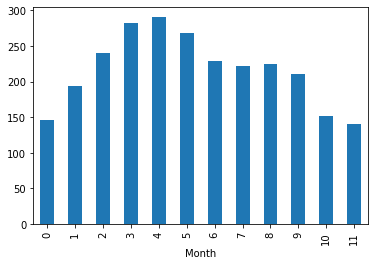

In [123]:
pclass_group['Radiation'].plot.bar()
plt.show()

In [124]:
df1.describe

<bound method NDFrame.describe of        Year  Month  Day  Hour  Radiation  Temperature  Precipitation  \
0      2017      0    0     0        0.0        12.05           4.82   
1      2017      0    0     1        0.0        11.58           4.88   
2      2017      0    0     2        0.0        11.21           4.88   
3      2017      0    0     3        0.0        10.82           4.88   
4      2017      0    0     4        0.0        10.41           4.88   
...     ...    ...  ...   ...        ...          ...            ...   
35083  2021      0    0    19        0.0        12.31           3.36   
35084  2021      0    0    20        0.0        11.62           3.36   
35085  2021      0    0    21        0.0        11.08           3.42   
35086  2021      0    0    22        0.0        10.68           3.36   
35087  2021      0    0    23        0.0        10.34           3.36   

       Humidity  Pressure  Windspeed  time_in_sec  Temp_multiply_humid  \
0           0.0     98.34  

In [125]:
#We drop the following columns
# df1 = df1.drop(['Time'], axis=1)

In [126]:
# df1 = df1[(df1 != -999)]
# df1

In [127]:
from sklearn.model_selection import train_test_split
X=df1[['Temperature', 'Pressure', 'Humidity', 'Windspeed',
      'time_in_sec', 'Temp_multiply_humid', 'Month',
       'Day']]


Y=df1.Radiation

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state= 0)

In [128]:
linreg= LinearRegression().fit(X_train, Y_train) 
print("Score: ",linreg.score(X,Y))
from sklearn.metrics import mean_squared_error
Target_predicted= linreg.predict(X_test) 
MSE=mean_squared_error(Y_test,Target_predicted) 
print('mean square error', MSE)

Score:  0.577115941961165
mean square error 36453.60950343586


# 2. Data Visualization

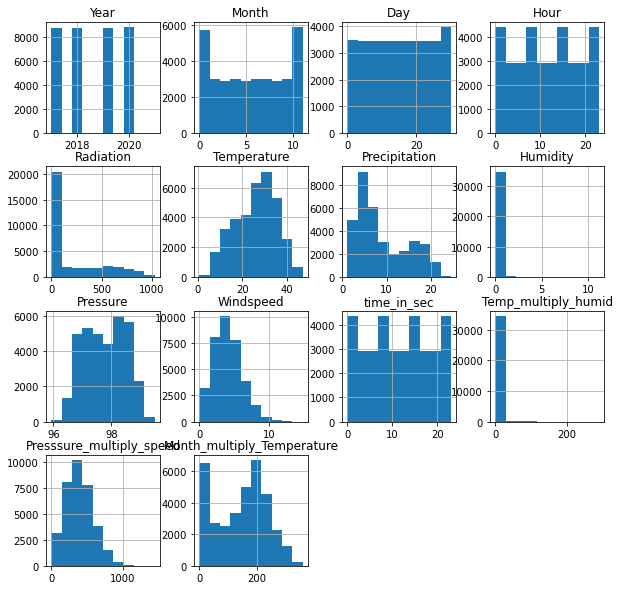

In [129]:
df1.hist(figsize=(10,10))
plt.show()

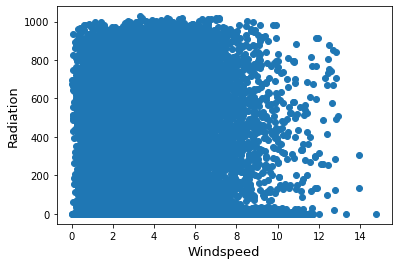

In [130]:
fig, ax = plt.subplots()
ax.scatter(x = df1['Windspeed'], y = df1['Radiation'])
plt.ylabel('Radiation', fontsize=13)
plt.xlabel('Windspeed', fontsize=13)
plt.show()

In [131]:
df1 = df1.drop(df1[(df1['Windspeed']>13)].index)

In [132]:
print(df1.shape)

(35084, 14)


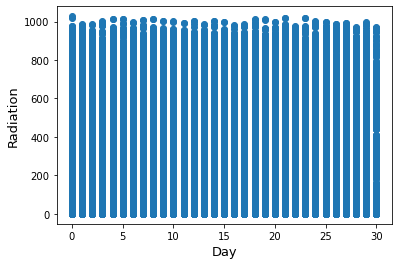

In [133]:
fig, ax = plt.subplots()
ax.scatter(x = df1['Day'], y = df1['Radiation'])
plt.ylabel('Radiation', fontsize=13)
plt.xlabel('Day', fontsize=13)
plt.show()

# 3. Model Fitting

In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [135]:
# sub = pd.DataFrame()
# sub = sub.reset_index()
# sub['Radiation'] = Target_predicted
# sub.to_csv('submission.csv',index=False)

In [136]:
print(df1.shape)

(35084, 14)


In [137]:
df1.to_csv("m_l_data_processed.csv")

# Function to apply new models

In [174]:
X=df1[['Temperature', 'Pressure', 'Humidity', 'Windspeed',
        'time_in_sec', 'Month',
      'Day']]
Y=df1.Radiation

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state= 0)
def model_score_error(model):
    prepared_model=model.fit(X_train, Y_train)
    x=prepared_model.score(X_test,Y_test)
    print('Score: ',x)
    Target_predicted=prepared_model.predict(X_test) 
    MSE=mean_squared_error(Y_test,Target_predicted) 
    print('Mean square error is: ', MSE)
#     accuracy_score(Y_test, Target_predicted)


# Lasso Regression

In [175]:

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=50))
model_score_error(lasso)

Score:  0.001284946964132172
Mean square error is:  86438.32525842862


# Elastic net regression

In [176]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, 
                                                l1_ratio=.9, 
                                                random_state=3))
model_score_error(ENet)

Score:  0.0012850837392917036
Mean square error is:  86438.31342060192


In [177]:
# scores


# Gradient Boosting Regression

In [178]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_score_error(GBoost)

Score:  0.9541097118116808
Mean square error is:  3971.783187373765


In [179]:
# scores


# Neural Network Model : Multi Layer Perceptron

In [180]:

MLP = MLPRegressor(activation='relu', alpha=10, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
model_score_error(MLP)

Score:  0.9333754928691623
Mean square error is:  5766.320233235752


C:\Users\Rajvi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [181]:
# scores


# RandomForest Regression

In [182]:
RandomForest = RandomForestRegressor(n_estimators=300, 
                                     random_state=0).fit(X_train, Y_train)
model_score_error(RandomForest)

Score:  0.9359115354298033
Mean square error is:  5546.826924248823


In [183]:
# scores


# Decision Tree Regressor

In [184]:
DTregressor = DecisionTreeRegressor(random_state=0).fit(X_train, Y_train)
model_score_error(DTregressor)

Score:  0.9291124479434831
Mean square error is:  6135.284797009003


In [185]:
# scores


# XGBoost

In [186]:

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=4200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             nthread=-1)
model_score_error(model_xgb)


[03:50:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Score:  0.9147331633179818
Mean square error is:  7379.805221192458


In [187]:
# skewness = pd.DataFrame({'Skew' :skewed_feats})
# skewness.head(10)
# skewness = skewness[abs(skewness) > 0.75]
# print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
# from scipy.special import boxcox1p
# skewed_features = skewness.index
# lam = 0.15
# for feat in skewed_features:
#     #all_data[feat] += 1
#     df1[feat] = boxcox1p(df1[feat], lam)

# Improving Scores

In [188]:
#Averaging base models
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
    # define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)
        return self    
    # predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

In [189]:
# Averaging models Score
averaged_models = AveragingModels(models = (ENet, GBoost,lasso))
model_score_error(averaged_models)

Score:  0.5421236012474548
Mean square error is:  39628.99023422355


In [190]:
# sub = pd.DataFrame()
# sub = sub.reset_index()
# sub['Radiation'] = Target_predicted
# sub.to_csv('submission.csv',index=False)

# AdaBoostRegressor

In [191]:
from sklearn.ensemble import AdaBoostRegressor
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300)
model_score_error(regr_2)

Score:  0.8955631138011999
Mean square error is:  9038.964127744224


#SVR 
Scores:  -0.412483280096
mean square error 138157.512653
\
#LinearRegression
Score:  0.622775747869
mean square error 37383.4435228
\
#lasso
Score:  0.626780417242
mean square error 36505.2740475
\
#ENet
Score:  0.626785317279
mean square error 36504.7947661
\
#MLP
Score:  0.803590072051
mean square error 19211.205887
\
#Decision tree 
score:  0.886921645453
mean square error 11060.3958428
\
#adaboost
Score:  0.928386215211
mean square error 1.38872120733
\
#RandomForestRegressor 
Score  0.937633857199
mean square error 6180.96544671
\
#GBoost
Score:  0.983160988421
mean square error 0.326538983515
\
#XGBRegressor
Score:  0.989414581383
mean square error 0.0115656619442